# Deep learning with Python

# 03. Getting started with neural networks

# 3.5 다중 분류 문제 : 로이터 데이터셋을 이용한 뉴스 기사 분류

## 데이터 불러오기

In [1]:
# 데이터 다운로드

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


이번에도 빈도수가 높은 단어 10000개만 사용

In [2]:
# 데이터 형태 확인

print("train data shape :", train_data.shape)
print("train labels shape :", train_labels.shape)
print("test data shape :", test_data.shape)
print("test labels shape :", test_labels.shape)

train data shape : (8982,)
train labels shape : (8982,)
test data shape : (2246,)
test labels shape : (2246,)


In [3]:
# data의 예시 데이터 출력
# 1차원 array인데 각 원소가 list인 train_data

train_data[0:2]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])],
      dtype=object)

In [4]:
# 디코딩해서 정수 인덱스를 다시 단어로 변환

word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 제외해야하는 토큰 : 0 - 패딩, 1 - 문서 시작, 2 - 사전에 없음

decoded_newswire_0 = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_newswire_0

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
# labels의 예시 데이터 출력

train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

## 데이터 준비

원래 텍스트 데이터는 원핫인코딩도 순서를 고려하는 것으로 알고 있는데 책 초반의 예제라 그런지 순서는 고려하지 않는 듯

- 원핫 인코딩 예시

[1, 3, 5] => [0, 1, 0, 1, 0, 1]

- 순서를 고려한 원핫 인코딩 예시

[1, 3, 5] => [[0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1]]

In [7]:
# 원핫인코딩

import numpy as np

def onehotencoding(sequences, dimension):
    
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.

    return result

In [8]:
# train과 test의 학습용 데이터 생성

onehot_x_train = onehotencoding(train_data, dimension = 10000)
onehot_x_test = onehotencoding(test_data, dimension = 10000)

onehot_y_train = onehotencoding(train_labels, dimension = 46)
onehot_y_test = onehotencoding(test_labels, dimension = 46)

In [9]:
# 케라스의 내장 함수를 이용하는 방법도 있음

from keras.utils.np_utils import to_categorical

## 데이터 홀드아웃 및 모델 학습

In [10]:
from keras import models
from keras import layers

def build_model():

    model = models.Sequential()
    model.add(layers.Dense(128, activation = 'relu', input_shape = (10000, )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(46, activation = 'softmax'))
    # 다중분류 문제에서 마지막 layer의 activation은 softmax로 지정

    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model

In [11]:
# train 데이터를 train과 validation으로 분할

x_train = onehot_x_train[:-1000]
x_val = onehot_x_train[-1000:]

y_train = onehot_y_train[:-1000]
y_val = onehot_y_train[-1000:]

# 모델 객체 생성

model_train = build_model()

In [12]:
import tensorflow as tf

tf.random.set_seed(20152410)

history = model_train.fit(x_train,
                          y_train,
                          epochs = 20,
                          batch_size = 512,
                          validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 110ms/step - loss: 2.8060 - accuracy: 0.4454 - val_loss: 1.4928 - val_accuracy: 0.7090
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 1.2208 - accuracy: 0.7327 - val_loss: 1.2112 - val_accuracy: 0.7340
Epoch 3/20
16/16 [==============================] - 1s 76ms/step - loss: 0.8244 - accuracy: 0.8237 - val_loss: 1.0994 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 76ms/step - loss: 0.5943 - accuracy: 0.8800 - val_loss: 1.0342 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 76ms/step - loss: 0.4532 - accuracy: 0.9081 - val_loss: 1.0082 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 77ms/step - loss: 0.3370 - accuracy: 0.9315 - val_loss: 0.9615 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 1s 76ms/step - loss: 0.2660 - accuracy: 0.9427 - val_loss: 0.9713 - val_accuracy: 0.7920
Epoch 8/20
1

In [13]:
import matplotlib
import matplotlib.pyplot as plt

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = list(range(1, len(loss) + 1))

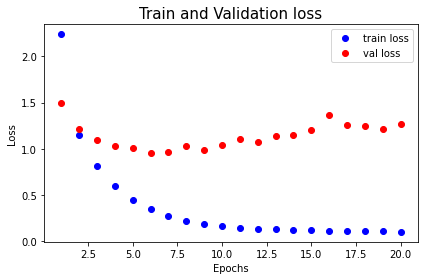

In [15]:
# train loss, validation loss 그래프 확인

plt.figure(figsize = (6, 4))
plt.plot(epochs, loss, 'bo', label = "train loss")
plt.plot(epochs, val_loss, 'ro', label = "val loss")

plt.title("Train and Validation loss", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

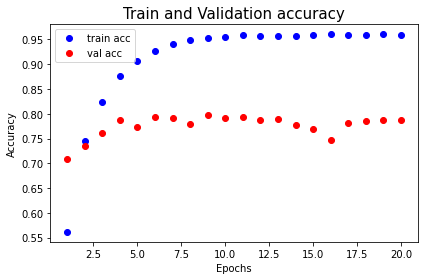

In [16]:
# train accuracy, validation accuracy 그래프 확인

plt.figure(figsize = (6, 4))
plt.plot(epochs, accuracy, 'bo', label = "train acc")
plt.plot(epochs, val_accuracy, 'ro', label = "val acc")

plt.title("Train and Validation accuracy", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
print("validation loss가 가장 낮았던 시점 : {}".format(np.argmin(val_loss)))
print("validation accuracy가 가장 높았던 시점 : {}".format(np.argmax(val_accuracy)))

print("validation loss의 최솟값 : {}".format(np.min(val_loss)))
print("validation accuracy의 최댓값 : {}".format(np.max(val_accuracy)))

validation loss가 가장 낮았던 시점 : 5
validation accuracy가 가장 높았던 시점 : 8
validation loss의 최솟값 : 0.961501955986023
validation accuracy의 최댓값 : 0.7979999780654907


validation accuracy가 약 80%로 가장 높았던 epochs = 8로 최종 모델을 학습하도록 하겠습니다.

## 최종 모델 학습

In [18]:
model_final = build_model()

train과 validation을 합쳐서 모델을 학습한 뒤 test 데이터로 성능을 평가해보도록 하겠습니다.

In [19]:
model_final.fit(onehot_x_train,
                onehot_y_train,
                epochs = 8,
                batch_size = 512)

Epoch 1/8
18/18 [==============================] - 2s 71ms/step - loss: 2.7987 - accuracy: 0.4191
Epoch 2/8
18/18 [==============================] - 1s 69ms/step - loss: 1.1529 - accuracy: 0.7694
Epoch 3/8
18/18 [==============================] - 1s 69ms/step - loss: 0.8191 - accuracy: 0.8316
Epoch 4/8
18/18 [==============================] - 1s 70ms/step - loss: 0.6017 - accuracy: 0.8797
Epoch 5/8
18/18 [==============================] - 1s 69ms/step - loss: 0.4524 - accuracy: 0.9056
Epoch 6/8
18/18 [==============================] - 1s 69ms/step - loss: 0.3282 - accuracy: 0.9301
Epoch 7/8
18/18 [==============================] - 1s 70ms/step - loss: 0.2453 - accuracy: 0.9482
Epoch 8/8
18/18 [==============================] - 1s 68ms/step - loss: 0.2170 - accuracy: 0.9469


In [20]:
result = model_final.evaluate(onehot_x_test, onehot_y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9748 - accuracy: 0.7961


In [21]:
print("최종 모델의 loss : {}".format(result[0]))
print("최종 모델의 accuracy : {}%".format(round(100*result[1], 2)))

최종 모델의 loss : 0.9747899174690247
최종 모델의 accuracy : 79.61%


## 새로운 데이터에 대해 예측하기

In [22]:
pred_test = model_final.predict(onehot_x_test)

In [23]:
pred_test[0]

array([4.07958723e-05, 6.10449424e-05, 5.00613578e-06, 9.41546917e-01,
       4.96349037e-02, 1.65864898e-04, 4.54346737e-05, 1.96495671e-06,
       3.22761014e-03, 4.95151580e-05, 4.41499542e-05, 1.02497113e-03,
       7.96587046e-05, 3.54250442e-05, 8.86256385e-06, 1.30036278e-05,
       3.45726410e-04, 1.23452788e-04, 7.18744468e-06, 1.27397897e-03,
       4.70250903e-04, 1.93189728e-04, 5.89020674e-05, 2.92513141e-04,
       6.24473296e-06, 7.84231888e-05, 1.35352448e-05, 2.07525281e-05,
       1.91042545e-05, 4.84869270e-05, 1.33024267e-04, 1.26383939e-05,
       2.80006316e-06, 1.00433945e-05, 1.96100897e-04, 2.11605638e-05,
       1.69083884e-04, 3.17737358e-05, 1.57790801e-05, 2.17708017e-04,
       7.23645935e-05, 1.93836113e-05, 1.28628555e-04, 3.17878912e-05,
       2.24648566e-08, 6.70239103e-07], dtype=float32)

In [24]:
np.sum(pred_test[0]), np.argmax(pred_test[0])

(0.9999997, 3)

각 클래스라고 예측할 확률을 다 더하면 1

그 중에서 가장 높은 값을 가진 index로 예측

labels를 onehot encoding 한 경우에는 손실 함수로 categorical_crossentropy를 사용하면 되고,

labels를 onehot encoding 하지 않고 그대로 사용하고 싶은 경우 손실함수로 sparse_categorical_crossentropy를 사용하면 된다

은닉층은 출력층보다 충분히 넓어야 한다. 만약 출력층보다 은닉층이 작다면 그 은닉층에서 정보의 병목 현상이 일어나게 된다.

=> n-1번째 은닉층은 n번째 은닉층보다 넓은게 n-1번째 은닉층에서의 정보 병목 현상을 방지하는데 좋다.